Website that I got this idea from: 

http://learnandshare645.blogspot.com/2016/06/feeding-your-own-data-set-into-cnn.html - reading in a directory of files to do the keras on.
 
https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html - creating a new sample of pictures from the old ones.

https://www.youtube.com/watch?v=LhEMXbjGV_4 - Preprocess images using keras.preprocessing.image

https://www.youtube.com/watch?v=daovGOlMbT4&index=12&list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL - Training the Keras model with fit_generator and batches

Imports

In [1]:

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D as c2d
from keras.layers.convolutional import MaxPooling2D as m2d
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator as idg
from tensorflow import keras

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
#import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split


Using TensorFlow backend.
/home/student/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
img_rows, img_cols = 200, 200
img_channels = 3

Figure out how to read in my own images
1. get the current path to the images
2. for each directory, read in the files
3. Convert the files to read into the keras

In [3]:
trng_path = os.getcwd()+'/catsndogs/train'
test_path = os.getcwd()+'/catsndogs/test'

train_batch = idg().flow_from_directory(trng_path, target_size=(200, 200), color_mode='rgb', classes=['dogs','cats'], class_mode='categorical', batch_size=10)
test_batch = idg().flow_from_directory(test_path, target_size=(200, 200), color_mode='rgb', classes=['dogs','cats'], class_mode='categorical', batch_size=5
                                      )

Found 647 images belonging to 2 classes.
Found 173 images belonging to 2 classes.


In [9]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if(type(ims[0])) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] !=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols= len(ims)//rows if len(ims)%2 ==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols, i+1)
        sp.axis('Off')
        if(titles is not None):
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs,labels = next(train_batch)

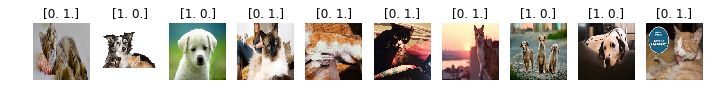

In [6]:
plots(imgs,titles = labels)

In [13]:
model = Sequential()
model.add(c2d(filters=64, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(200, 200, 3)))
model.add(c2d(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(m2d(pool_size=4))
model.add(Dense(200, activation="relu", input_shape=(256*256,)))
#model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 64)      1792      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 200, 200, 32)      18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 50, 50, 200)       6600      
_________________________________________________________________
flatten_2 (Flatten)          (None, 500000)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1000002   
Total params: 1,026,858
Trainable params: 1,026,858
Non-trainable params: 0
_________________________________________________________________


In [14]:
layer_input = model.layers[1]
print(layer_input.get_weights()[0].shape)

(3, 3, 64, 32)


In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
training_model = model.fit_generator(train_batch, steps_per_epoch=10, validation_data=test_batch, validation_steps =10, epochs=5, verbose=2)

Epoch 1/5
 - 38s - loss: 7.6737 - acc: 0.5100 - val_loss: 7.4535 - val_acc: 0.5376
Epoch 2/5
 - 38s - loss: 7.2531 - acc: 0.5500 - val_loss: 7.4535 - val_acc: 0.5376
Epoch 3/5
 - 37s - loss: 7.4619 - acc: 0.5370 - val_loss: 7.4535 - val_acc: 0.5376
Epoch 4/5
 - 37s - loss: 6.9308 - acc: 0.5700 - val_loss: 7.4535 - val_acc: 0.5376
Epoch 5/5
 - 37s - loss: 6.4472 - acc: 0.6000 - val_loss: 7.4535 - val_acc: 0.5376


path1 = os.getcwd()+'/myimages/catsndogs'
path2 = os.getcwd()+'/myimagesresized/catsndogs'
listing = os.listdir(path1) 
#print(listing)

for directory in listing:
    print("directory is " + directory)
    if(directory == '.ipynb_checkpoints'):
        continue
    dirname = (path1+'/'+directory)
    dirfiles = os.listdir(dirname)
    for subdir in dirfiles:
        print("subdir is " + subdir)
        if(subdir == '.ipynb_checkpoints'):
            continue
        subdirname = (path1+'/'+directory+'/'+subdir)
        print(subdirname)
        subdirname = os.listdir(subdirname)
        #print(dirfiles)
        for file in subdirname:
            if(file == '.ipynb_checkpoints'):
                continue
            im = Image.open(dirname + '/' + file)   
            img = im.resize((img_rows,img_cols))
            #gray = img.convert('L')
                        #need to do some more processing here           
            img.save(path2 + directory +'/'+subdir+'/' +  file, "JPEG")

path1 = os.getcwd()+'/myimages/'
path2 = os.getcwd()+'/myimagesresized/'
listing = os.listdir(path1) 
#print(listing)

for directory in listing:
    print(directory)
    if(directory == '.ipynb_checkpoints'):
        continue
    dirname = (path1+'/'+directory)
    dirfiles = os.listdir(dirname)
    #print(dirfiles)
    for file in dirfiles:
        if(file == '.ipynb_checkpoints'):
            continue
        im = Image.open(dirname + '/' + file)   
        img = im.resize((img_rows,img_cols))
        #gray = img.convert('L')
                    #need to do some more processing here           
        img.save(path2 + directory +'/' +  file, "JPEG")

imlist = os.listdir(path2+'/acquarium/')

im1 = array(Image.open(path2 + '/acquarium/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
#print(imnbr)
#print(im1)
#immatrix = array([array(Image.open(path2 + '/acquarium/' + im2)).flatten() for im2 in imlist],'f')
immatrix = np.array([])

for image in imlist:
    if(image == '.ipynb_checkpoints'):
        continue
    arry = array(Image.open(path2 + '/acquarium/' + image)).flatten()
    #print(arry.shape)
    immatrix = np.append(immatrix, arry, axis=0)

print(immatrix.shape)